In [18]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
# mapping number values to classes
target_map = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot"
}

# getting the train and test data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [20]:
# get shapes
print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)
print("x test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (60000, 28, 28)
y train shape:  (60000,)
x test shape:  (10000, 28, 28)
y test shape:  (10000,)


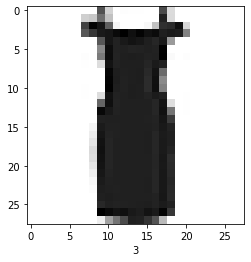

In [21]:
# plotting a random image
idx = random.randint(0, 59999)

plt.imshow(x_train[idx], cmap="Greys")
plt.xlabel(f"{y_train[idx]}")
plt.show()

In [22]:
# normalizing the images
x_train = x_train/255.0
x_test = x_test/255.0

In [23]:
# creating model containing a flattening layer, a dense layer and an output layer with the softmax activation function
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(np.unique(y_train)), "softmax")
])

In [24]:
# compile model
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [25]:
# train for 5 epochs 
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4970 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3758 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3363 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3136 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2962 - accuracy: 0.8917


In [26]:
# check how it fares on unseen data
eval_loss, eval_accuracy = model.evaluate(x_test, y_test)
print("Test loss: ", eval_loss)
print("Test accuracy: ", eval_accuracy)

313/313 [==============================] - 3s 5ms/step - loss: 0.3481 - accuracy: 0.8750
Test loss:  0.34808605909347534
Test accuracy:  0.875


In [27]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 2s 5ms/step


array([1.0165558e-06, 7.5457809e-09, 4.1971529e-07, 4.4451468e-07,
       1.4611651e-06, 3.2625273e-03, 4.5867041e-06, 1.1842269e-02,
       3.6909350e-05, 9.8485041e-01], dtype=float32)

In [28]:
class_idx = np.argmax(predictions[0])
class_idx

9

Text(0, 0.5, 'Actual class: Ankle boot')

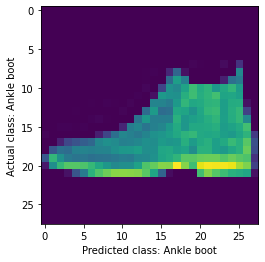

In [29]:
cat = target_map[str(class_idx)]

plt.imshow(x_test[0])
plt.xlabel(f"Predicted class: {cat}")
plt.ylabel(f"Actual class: {target_map[str(y_test[0])]}")

In [ ]:
# Tinkering
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"]
        )

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

In [40]:
# adding callbacks
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# creating a custom callback that inherits from the base callback class and calls a function after every epoch
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            '''
            Halts the training after reaching 85 percent accuracy

            Args:
            epoch (integer) - index of epoch
            logs (dict) - metric results from the training epoch
            '''
            # check if accuracy greater than 85
            if (logs.get("accuracy") >= 0.85):
                
                # end training process
                print(f"\nStopping at epoch {epoch+1} as accuracy has reached 85%\n")
                self.model.stop_training = True

callback = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"]
        )

model.fit(training_images, training_labels, epochs=10, callbacks=[callback])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5199 - accuracy: 0.8195
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.3916 - accuracy: 0.8594
Stopping at epoch 2 as accuracy has reached 80%

313/313 [==============================] - 2s 4ms/step
[1.24602866e-05 7.38183417e-08 1.14015405e-04 1.01543549e-06
 1.81222458e-05 6.73634335e-02 2.57413340e-05 1.31975308e-01
 1.11683272e-03 7.99372971e-01]
9


### Notes

1. Increasing the number of units in the hidden layer makes the model take longer to run due to more calculations, but it boosts the accuracy.

2. Normalizing reduces the range of pixel values, and makes the model more accurate

3. Callbacks are a great way to prevent overfitting. 